In [161]:
import pandas as pd

df = pd.read_parquet("../data/ETHTUSD.parquet.gzip")
df = df.drop(["month", "year", "symbol"], axis = 1)
df.head()

,min,max,mean,median,quantity_count,quantity_sum,quantity_min,quantity_max,quantity_mean,quantity_median,side
timestamp,,,,,,,,,,,
2024-01-27 10:35:46.433085+00:00,2294.52,2303.20,2298.2651,2297.965,100,108.0758,0.0022,56.4191,1.080758,0.0398,asks
2024-01-27 10:35:46.780221+00:00,2294.52,2303.20,2298.2651,2297.965,100,108.0758,0.0022,56.4191,1.080758,0.0398,asks
2024-01-27 10:35:47.121114+00:00,2294.52,2303.33,2298.4287,2298.095,100,107.9737,0.0022,56.4191,1.079737,0.0260,asks
2024-01-27 10:35:47.902214+00:00,2294.52,2303.33,2298.4287,2298.095,100,107.9737,0.0022,56.4191,1.079737,0.0260,asks
2024-01-27 10:35:48.254500+00:00,2294.52,2303.33,2298.4287,2298.095,100,107.9737,0.0022,56.4191,1.079737,0.0260,asks


<Axes: xlabel='timestamp'>

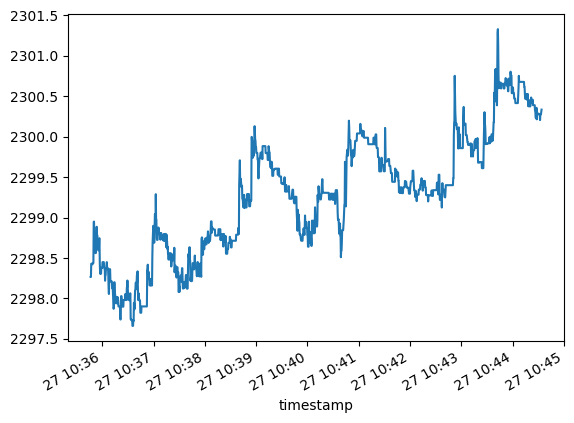

In [162]:
asks = df[df["side"] == "asks"]
asks["mean"].plot()

## add some additional columns that could be interesting

In [163]:
# group by side
df["spread"] = df["max"] / df["min"]
df["vol_diff_mean_median"] = df["quantity_mean"] / df["quantity_median"]
df["vol_spread"] = df["quantity_max"] / df["quantity_min"]
df.head()

,min,max,mean,median,quantity_count,quantity_sum,quantity_min,quantity_max,quantity_mean,quantity_median,side,spread,vol_diff_mean_median,vol_spread
timestamp,,,,,,,,,,,,,,
2024-01-27 10:35:46.433085+00:00,2294.52,2303.20,2298.2651,2297.965,100,108.0758,0.0022,56.4191,1.080758,0.0398,asks,1.003783,27.154724,25645.045455
2024-01-27 10:35:46.780221+00:00,2294.52,2303.20,2298.2651,2297.965,100,108.0758,0.0022,56.4191,1.080758,0.0398,asks,1.003783,27.154724,25645.045455
2024-01-27 10:35:47.121114+00:00,2294.52,2303.33,2298.4287,2298.095,100,107.9737,0.0022,56.4191,1.079737,0.0260,asks,1.003840,41.528346,25645.045455
2024-01-27 10:35:47.902214+00:00,2294.52,2303.33,2298.4287,2298.095,100,107.9737,0.0022,56.4191,1.079737,0.0260,asks,1.003840,41.528346,25645.045455
2024-01-27 10:35:48.254500+00:00,2294.52,2303.33,2298.4287,2298.095,100,107.9737,0.0022,56.4191,1.079737,0.0260,asks,1.003840,41.528346,25645.045455


## explore correlations between price rises

In [164]:
asks = df[df["side"] == "asks"]
asks = asks.drop(["side"], axis = 1)
asks["mean_pct_change"] = asks["mean"].pct_change()
asks["signal"] = asks["mean_pct_change"].apply(lambda x: 1 if x > 0 else 0)
asks["target"] = asks["signal"].shift(-1).ffill().fillna(0)
asks = asks.fillna(0)

In [165]:
# ## min max scaling
# # required poetry dev install
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler((0,1))
# Y = asks["target"]
# asks = pd.DataFrame(scaler.fit_transform(asks), columns = asks.columns, index = asks.index)
# # leave target as is
# asks["target"] = Y
# asks.head()


In [166]:
corrs = asks.corr()["target"].sort_values(ascending = False)
corrs

target                  1.000000
signal                  0.084249
quantity_max            0.076113
quantity_sum            0.072843
quantity_mean           0.072843
vol_spread              0.072450
vol_diff_mean_median    0.036165
mean_pct_change         0.017270
spread                  0.009337
quantity_median         0.004940
quantity_min           -0.061156
max                    -0.073811
median                 -0.074994
mean                   -0.078499
min                    -0.080410
quantity_count               NaN
Name: target, dtype: float64

/opt/homebrew/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

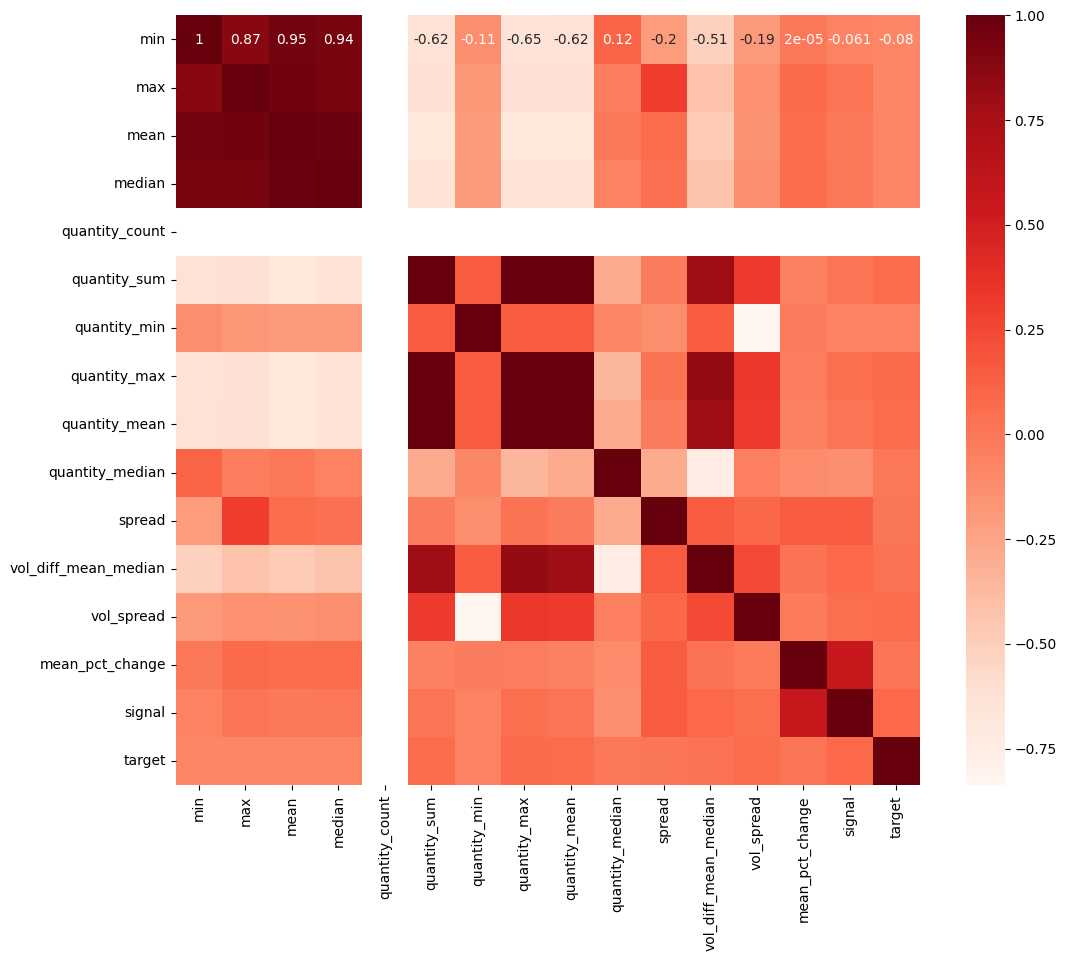

In [167]:
# visualize heatmap 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(asks.corr(), annot=True, cmap=plt.cm.Reds)

### try to build a minimal depth decision tree

In [168]:
from sklearn.tree import DecisionTreeClassifier

# no train test split vor visualization purposes

Y = asks["target"]
print("Y value counts: " + str(Y.value_counts()))
X = asks.drop(["target"], axis = 1)

for i in range(1, 10):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X, Y)
    scr = clf.score(X, Y)
    print("depth: ", i, "score: ", scr)


Y value counts: target
0.0    1092
1.0     308
Name: count, dtype: int64
depth:  1 score:  0.78
depth:  2 score:  0.7842857142857143
depth:  3 score:  0.7892857142857143
depth:  4 score:  0.7914285714285715
depth:  5 score:  0.7978571428571428
depth:  6 score:  0.8085714285714286
depth:  7 score:  0.8164285714285714
depth:  8 score:  0.8314285714285714
depth:  9 score:  0.8371428571428572


In [169]:
# go with depth 3 for now
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X, Y)

DecisionTreeClassifier(max_depth=3)

[Text(0.4583333333333333, 0.875, 'mean <= 2299.229\ngini = 0.343\nsamples = 1400\nvalue = [1092, 308]\nclass = 0'),
 Text(0.25, 0.625, 'min <= 2295.655\ngini = 0.401\nsamples = 594\nvalue = [429, 165]\nclass = 0'),
 Text(0.16666666666666666, 0.375, 'mean_pct_change <= 0.0\ngini = 0.397\nsamples = 590\nvalue = [429, 161]\nclass = 0'),
 Text(0.08333333333333333, 0.125, 'gini = 0.393\nsamples = 587\nvalue = [429, 158]\nclass = 0'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1'),
 Text(0.6666666666666666, 0.625, 'quantity_sum <= 38.962\ngini = 0.292\nsamples = 806\nvalue = [663, 143]\nclass = 0'),
 Text(0.5, 0.375, 'mean <= 2300.34\ngini = 0.49\nsamples = 14\nvalue = [6, 8]\nclass = 1'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 1'),
 Text(0.5833333333333334, 0.125, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]\nclass = 0'),
 Text(0.8333333

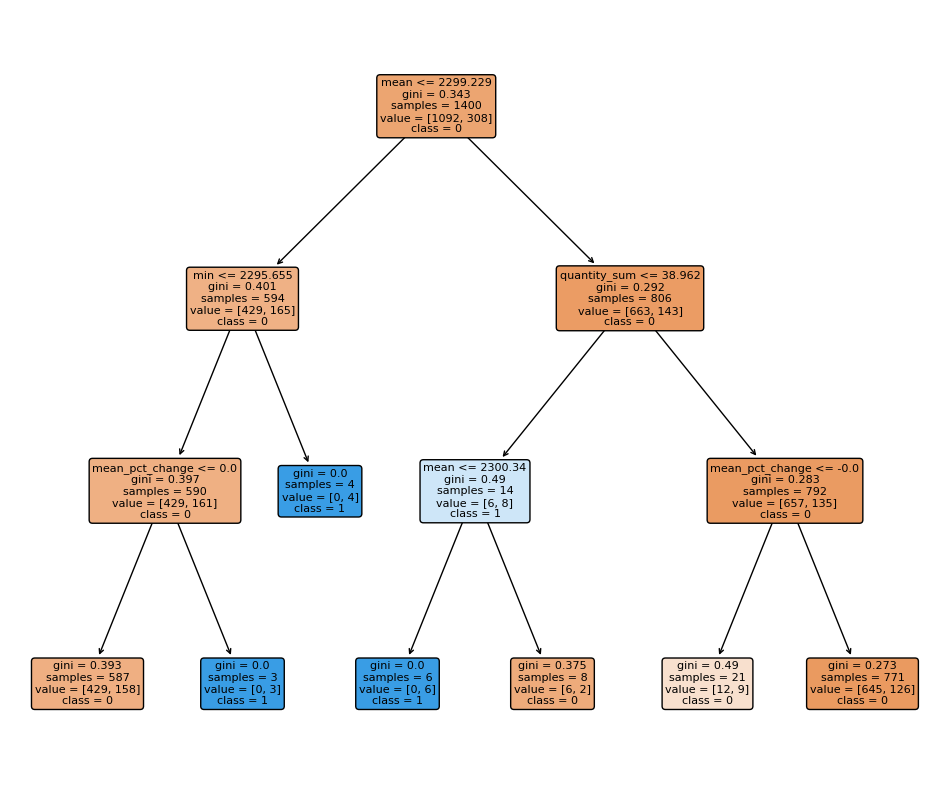

In [170]:
# visualize decision tree
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(clf, feature_names = X.columns, class_names = ["0", "1"], filled = True, rounded = True)

## can we achieve a higher score with more technical stats?

In [171]:
from ta import add_all_ta_features
# i know this is not ohlc data, but we can emulate it
asks = add_all_ta_features(asks, open="mean", high="max", low="min", close="mean", volume="quantity_sum", fillna=True)
asks.head()

/opt/homebrew/lib/python3.11/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
/opt/homebrew/lib/python3.11/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


,min,max,mean,median,quantity_count,quantity_sum,quantity_min,quantity_max,quantity_mean,quantity_median,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-27 10:35:46.433085+00:00,2294.52,2303.20,2298.2651,2297.965,100,108.0758,0.0022,56.4191,1.080758,0.0398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2298.265100,-0.043415,0.000000,0.000000
2024-01-27 10:35:46.780221+00:00,2294.52,2303.20,2298.2651,2297.965,100,108.0758,0.0022,56.4191,1.080758,0.0398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2298.265100,0.000000,0.000000,0.000000
2024-01-27 10:35:47.121114+00:00,2294.52,2303.33,2298.4287,2298.095,100,107.9737,0.0022,56.4191,1.079737,0.0260,...,0.000568,0.000114,0.000454,-0.007537,-0.001507,-0.006029,2298.307108,0.007118,0.007118,0.007118
2024-01-27 10:35:47.902214+00:00,2294.52,2303.33,2298.4287,2298.095,100,107.9737,0.0022,56.4191,1.079737,0.0260,...,0.001006,0.000292,0.000714,-0.013356,-0.003877,-0.009479,2298.338319,0.000000,0.000000,0.007118
2024-01-27 10:35:48.254500+00:00,2294.52,2303.33,2298.4287,2298.095,100,107.9737,0.0022,56.4191,1.079737,0.0260,...,0.001338,0.000501,0.000837,-0.017765,-0.006655,-0.011110,2298.361518,0.000000,0.000000,0.007118


/opt/homebrew/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

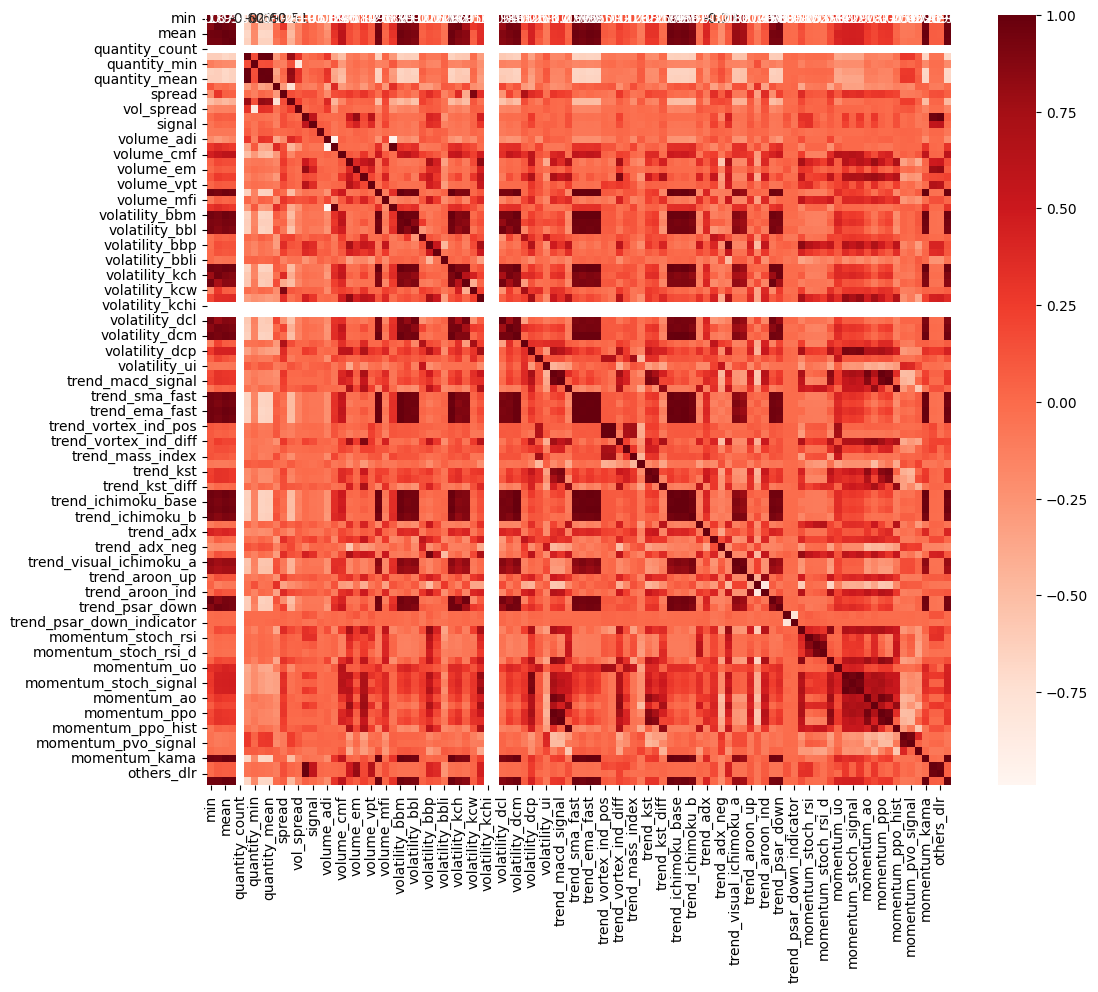

In [172]:
plt.figure(figsize=(12,10))
sns.heatmap(asks.corr(), annot=True, cmap=plt.cm.Reds)

In [173]:
corrs = asks.corr()["target"].sort_values(ascending = False)
# keep the top 10 absolute correlated features
corrs = corrs[abs(corrs) > 0.079]
corrs

target                 1.000000
signal                 0.084249
volatility_dcm        -0.079039
trend_ema_fast        -0.079304
trend_sma_fast        -0.079644
trend_ema_slow        -0.080020
volatility_bbm        -0.080229
min                   -0.080410
trend_ichimoku_base   -0.080819
trend_ichimoku_conv   -0.081181
volatility_kcc        -0.081317
trend_ichimoku_a      -0.081454
volume_vwap           -0.084481
volatility_kcl        -0.086058
trend_psar_up         -0.086678
volatility_dcl        -0.091275
volatility_bbl        -0.097115
Name: target, dtype: float64

a lot of trend and volatility values seem to correlate a lot with our target variable... makes sense!

In [174]:
X = asks.drop(["target"], axis = 1)
Y = asks["target"]

for i in range(1, 10):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X, Y)
    scr = clf.score(X, Y)
    print("depth: ", i, "score: ", scr)

depth:  1 score:  0.78
depth:  2 score:  0.78
depth:  3 score:  0.7957142857142857
depth:  4 score:  0.82
depth:  5 score:  0.845
depth:  6 score:  0.8635714285714285
depth:  7 score:  0.8778571428571429
depth:  8 score:  0.8835714285714286
depth:  9 score:  0.8942857142857142


In [175]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X, Y)
scr = clf.score(X, Y)
print("depth: ", 2, "score: ", scr)

depth:  2 score:  0.78


In [176]:
# classification report
from sklearn.metrics import classification_report
y_pred = clf.predict(X)
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      1092
         1.0       0.00      0.00      0.00       308

    accuracy                           0.78      1400
   macro avg       0.39      0.50      0.44      1400
weighted avg       0.61      0.78      0.68      1400



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.8333333333333334, 'momentum_wr <= -58.374\ngini = 0.343\nsamples = 1400\nvalue = [1092, 308]\nclass = 0'),
 Text(0.25, 0.5, 'momentum_pvo <= 0.424\ngini = 0.459\nsamples = 227\nvalue = [146, 81]\nclass = 0'),
 Text(0.125, 0.16666666666666666, 'gini = 0.362\nsamples = 118\nvalue = [90, 28]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 109\nvalue = [56, 53]\nclass = 0'),
 Text(0.75, 0.5, 'volatility_kcp <= 0.496\ngini = 0.312\nsamples = 1173\nvalue = [946, 227]\nclass = 0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.291\nsamples = 1093\nvalue = [900, 193]\nclass = 0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.489\nsamples = 80\nvalue = [46, 34]\nclass = 0')]

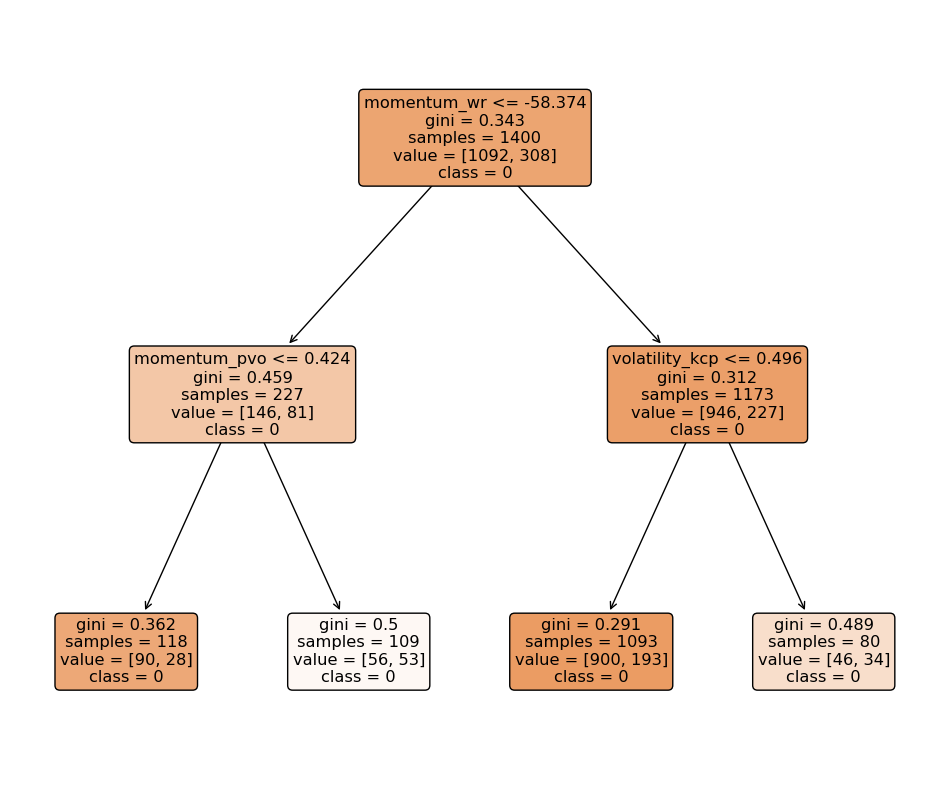

In [177]:
# visualize tree
plt.figure(figsize=(12,10))
tree.plot_tree(clf, feature_names = X.columns, class_names = ["0", "1"], filled = True, rounded = True)

## and what now? how can we use this to predict if the mean price will rise or fall?

using these values with a simple decision tree, we can predict if the next mean price will be higher or lower than now with an accuracy of 0.79. With a better classifier like xgb we might even get more percentage, but we could use this simple decision tree for a simple if/else strategy.

In [178]:
# translate tree to code
from sklearn.tree import export_text
r = export_text(clf, feature_names = list(X.columns))
print(r)

|--- momentum_wr <= -58.37
|   |--- momentum_pvo <= 0.42
|   |   |--- class: 0.0
|   |--- momentum_pvo >  0.42
|   |   |--- class: 0.0
|--- momentum_wr >  -58.37
|   |--- volatility_kcp <= 0.50
|   |   |--- class: 0.0
|   |--- volatility_kcp >  0.50
|   |   |--- class: 0.0



## trying for an even better model

In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True)

In [180]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(x_train, y_train)
scr = clf.score(x_test, y_test)
print("score: ", scr)

pred = clf.predict(x_test)
print(classification_report(y_test, pred))

score:  0.7678571428571429
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.86       219
         1.0       0.40      0.13      0.20        61

    accuracy                           0.77       280
   macro avg       0.60      0.54      0.53       280
weighted avg       0.71      0.77      0.72       280



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

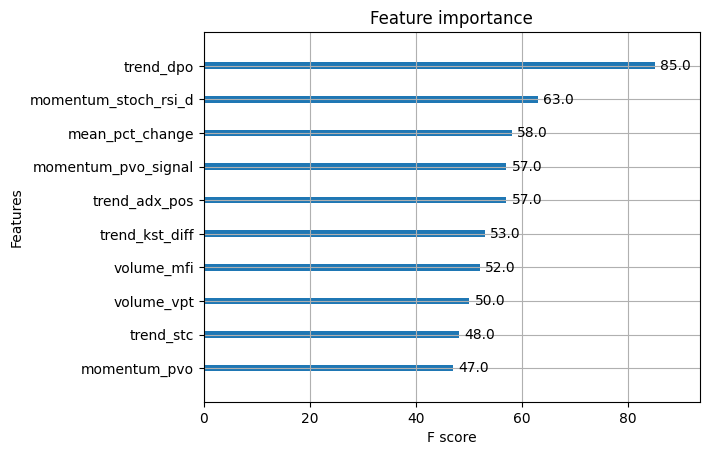

In [181]:
# plot feature importance
from xgboost import plot_importance
plot_importance(clf, max_num_features = 10)

## simulate market trading

i know i'm leaving out a lot of things here, but just to get an overview.
biggest con estimate:

- i cant execute a trade in milliseconds, basically i'll miss the price raise / fall
- i cant execute a trade with 0 fees
- we are just looking at the asks, we should also be looking at the bids

In [182]:
pred = clf.predict(X)
money = 10000
eth = 0
buyHoldEth = money / X["mean"][0]
portfolio = []
buyHoldPortfolio = []

for i in range(len(X)):
    if pred[i] == 1 and eth == 0 and money > 0:
        # buy
        eth = money / X["mean"][i]
        money = 0
    elif pred[i] == 0 and eth > 0:
        # sell
        money = eth * X["mean"][i]
        eth = 0
    portfolio.append(money + eth * X["mean"][i])
    buyHoldPortfolio.append(buyHoldEth * X["mean"][i])
# last day sale
if eth > 0:
    money = eth * X["mean"][i]
    eth = 0

print("money: ", money)
print("buyhold: ", buyHoldEth * X["mean"][i])

money:  10122.465997563273
buyhold:  10005.342725693394


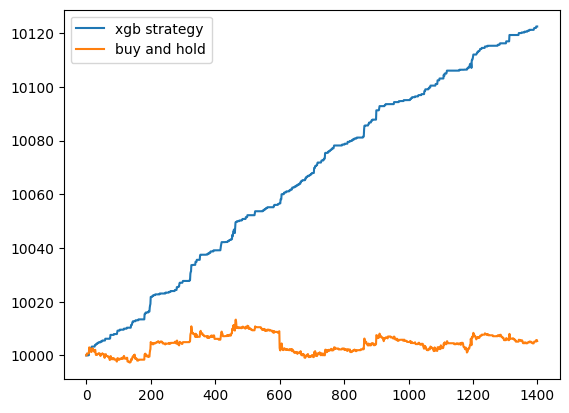

In [183]:
import matplotlib.pyplot as plt
plt.plot(portfolio, label = "xgb strategy")
plt.plot(buyHoldPortfolio, label = "buy and hold")
plt.legend()